In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
# print the intercept
print(lm.intercept_)

-2641372.66730168


In [11]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


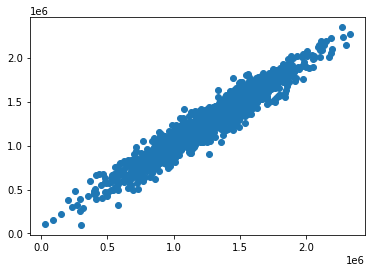

In [13]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

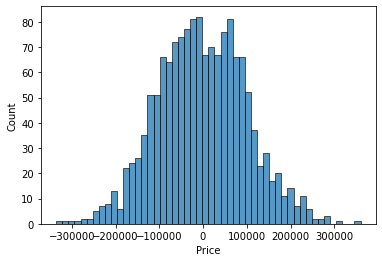

In [15]:
sns.histplot((y_test-predictions),bins=50);

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81257.55795856066
MSE: 10169125565.897734
RMSE: 100842.08231635111


## with Regularization

In [53]:
df1 = pd.read_csv('USA_Housing.csv').to_numpy()
X, y = df1[:, 0:5], df1[:, 5]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
print(X_test[0])
print(y_test[0])

[66774.99581728588 5.717143201084843 7.795214820544994 4.32
 36788.98032695149]
1251688.6157028743


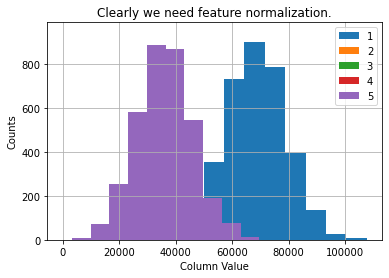

In [56]:
#Quick visualize data
plt.grid(True)
plt.hist(X_train[:,0],label = 'col1')
plt.hist(X_train[:,1],label = 'col2')
plt.hist(X_train[:,2],label = 'col3')
plt.hist(X_train[:,3],label = 'col4')
plt.hist(X_train[:,4],label = 'col5')

plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend(['1','2','3','4','5'])

Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    

In [57]:
def  featureNormalize(X):
   
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    n = X.shape[1]

    for i in range(n):
        mu[i] = np.mean(X[:,i])
    for i in range(n):
        sigma[i] = np.std(X[:,i])
    for i in range(n):
        X_norm[:,i] = (X[:,i]-mu[i])/sigma[i]
    
    return X_norm, mu, sigma

In [58]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X_train)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [6.84405508e+04 5.97204457e+00 6.98243593e+00 3.96387714e+00
 3.61505825e+04]
Computed standard deviation: [1.05918067e+04 9.77720868e-01 1.00051237e+00 1.22978694e+00
 9.92283438e+03]


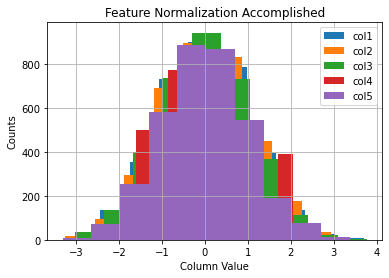

In [59]:
plt.grid(True)
#plt.xlim([-5,5])
dummy = plt.hist(X_norm[:,0],label = 'col1')
dummy = plt.hist(X_norm[:,1],label = 'col2')
dummy = plt.hist(X_norm[:,2],label = 'col3')
dummy = plt.hist(X_norm[:,3],label = 'col4')
dummy = plt.hist(X_norm[:,4],label = 'col5')



plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [60]:
#After the featureNormalize function is tested, we now add the intercept term to X_norm:

m = y_train.size
# Add intercept term to X
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [61]:
X_train.shape

(3500, 6)

In [62]:
def computeCostMulti(X, y, theta):
    
    m = y.shape[0] # number of training examples
    
    J = 0
    J = (np.sum(np.square(np.dot(X,theta)-y)))/(2*m)
    
    return J

In [63]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    m = y.shape[0] # number of training examples
    
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha/m)*(np.dot(X.transpose(),(np.dot(X,theta)-y)))
        
        
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: [1228189.9612082806 228969.15822469429 161538.83450802596
 121448.55801090124 1640.7924457536496 151078.5912243163]


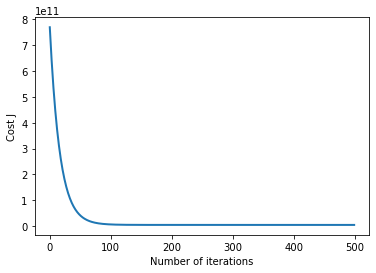

In [66]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 500

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')


print('theta computed from gradient descent: {:s}'.format(str(theta)))

price = 0  
price = theta[0]*1 + theta[1]*((66774.99581728588-mu[0])/sigma[0]) + theta[2]*((5.717143201084843-mu[1])/sigma[1])\
    +theta[3]*((7.795214820544994-mu[2])/sigma[2])+theta[4]*((4.32-mu[3])/sigma[3])+theta[5]*((36788.98032695149-mu[4])/sigma[4])



In [65]:

print('Predicted price of the first X_test with y_test of $1251688.6157028743: ${:.0f}'.format(price))


Predicted price of the first X_test with y_test of $1251688.6157028743: $1258925


### with Sklearn libraries


In [78]:
m=y_test.size
X_norm_test, mu, sigma = featureNormalize(X_test)
X_test = np.concatenate([np.ones((m, 1)), X_norm_test], axis=1)

In [79]:
lm = LinearRegression()
lm.fit(X_train[:,1:],y_train)

LinearRegression()

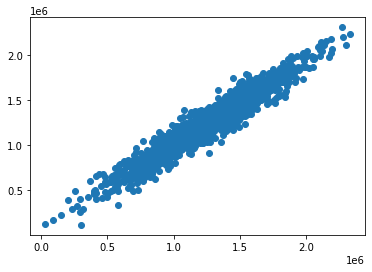

In [84]:
predictions = lm.predict(X_test[:,1:])
plt.scatter(y_test,predictions)

In [94]:
np.array([list(X_test[0,1:])])

array([[-0.19821699, -0.26620569,  0.7811007 ,  0.2397251 ,  0.05995523]])

In [96]:

price=lm.predict(np.array([list(X_test[0,1:])]))
print(f'Predicted price of the first X_test with y_test of $1251688.6157028743: {price}')

Predicted price of the first X_test with y_test of $1251688.6157028743: [1244126.69611592]
